In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('Admission_Predict.csv')
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
serial = raw_data['Serial No.']

# EXPLORATORY DATA ANALYSIS

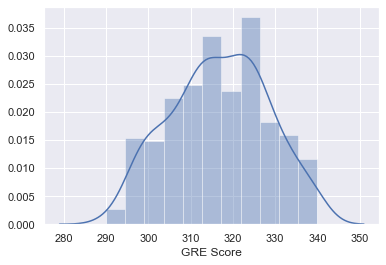

In [7]:
sns.distplot(raw_data['GRE Score'])

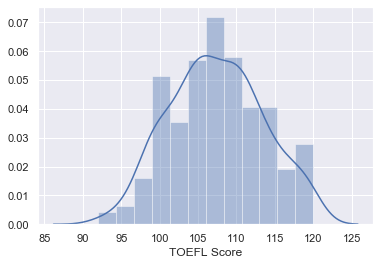

In [8]:
sns.distplot(raw_data['TOEFL Score'])

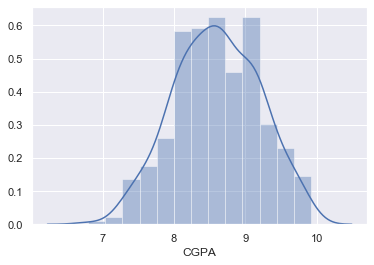

In [9]:
sns.distplot(raw_data['CGPA'])

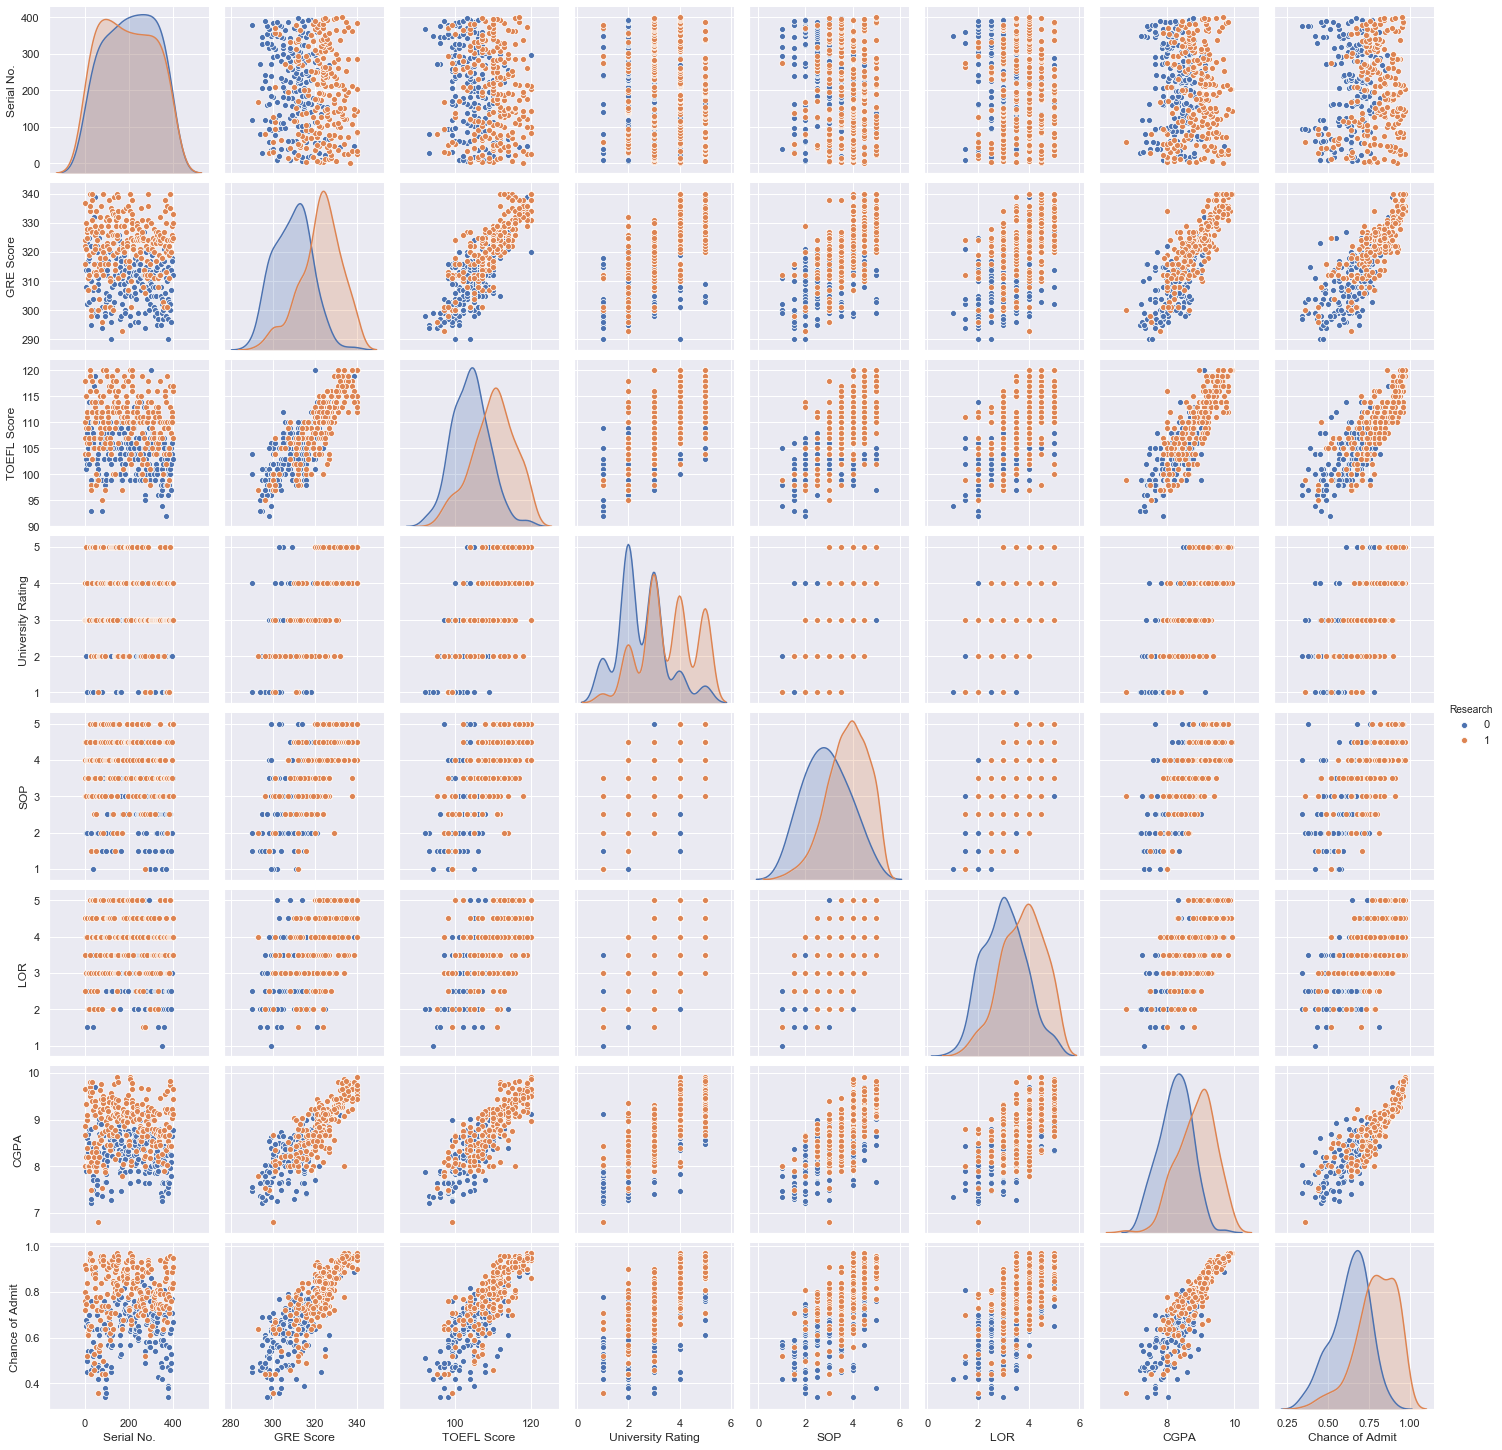

In [10]:
sns.pairplot(raw_data,hue='Research')

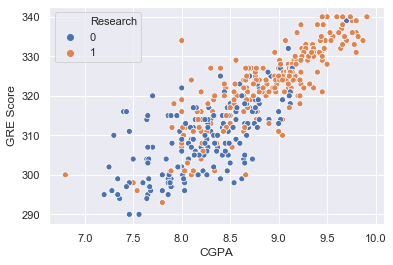

In [14]:
sns.scatterplot(raw_data['CGPA'],raw_data['GRE Score'],data=raw_data,hue='Research')

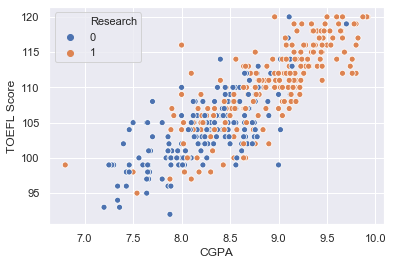

In [13]:
sns.scatterplot(raw_data['CGPA'],raw_data['TOEFL Score'],data=raw_data,hue='Research')

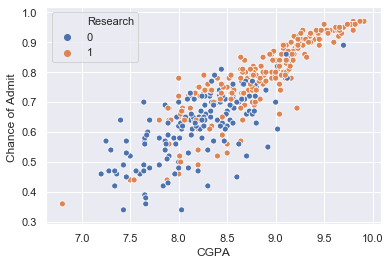

In [16]:
sns.scatterplot(raw_data['CGPA'],raw_data['Chance of Admit '],data=raw_data,hue='Research')

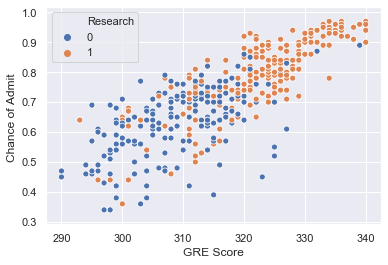

In [17]:
sns.scatterplot(raw_data['GRE Score'],raw_data['Chance of Admit '],data=raw_data,hue='Research')

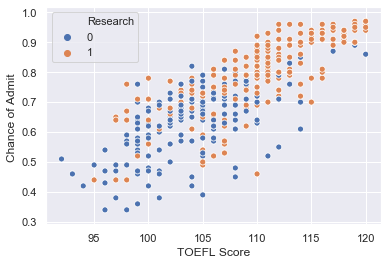

In [19]:
sns.scatterplot(raw_data['TOEFL Score'],raw_data['Chance of Admit '],data=raw_data,hue='Research')

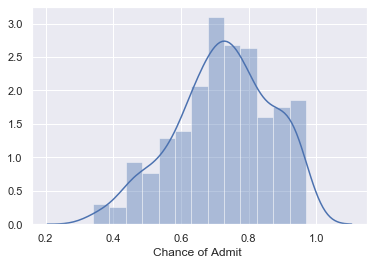

In [20]:
sns.distplot(raw_data['Chance of Admit '])

In [67]:
def map_score(entry):
    if entry > 0.5:
        return 1
    else:
        return 0

In [22]:
from sklearn.cluster import KMeans

In [23]:
km = KMeans()

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [27]:
X = raw_data.drop(['Research'],axis=1)
y = raw_data['Research']

In [28]:
km.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
predictions = km.predict(X)

In [32]:
cluster = pd.DataFrame()

In [33]:
cluster['true'] = y

In [34]:
cluster['predicted_cluster'] = predictions

In [35]:
cluster.head()

,true,predicted_cluster
0,1,1
1,1,1
2,1,1
3,1,1
4,0,1


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
new_x = raw_data.drop(['Chance of Admit '],axis=1)

In [44]:
sc.fit(new_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
scaled_data = sc.transform(new_x)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model = LogisticRegression()

In [48]:
new_y = raw_data['Chance of Admit ']

In [49]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,raw_data['chance'],test_size=0.2,random_state=42)

In [68]:
res = list(map(map_score,raw_data['Chance of Admit ']))

In [69]:
raw_data['chance'] = res

In [70]:
raw_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1


In [76]:
raw_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350,0.91250
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609,0.28292
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,0.00000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000,1.00000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000,1.00000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000,1.00000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000,1.00000


In [88]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
pred = log_model.predict(X_test)

In [90]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.95      1.00      0.97        70

    accuracy                           0.95        80
   macro avg       0.97      0.80      0.86        80
weighted avg       0.95      0.95      0.94        80



In [92]:
print(confusion_matrix(y_test,pred))

[[ 6  4]
 [ 0 70]]


In [93]:
coeffs = log_model.coef_

In [99]:
coeffs = coeffs.reshape(8,1)

In [100]:
summary_table = pd.DataFrame(data=coeffs,index=new_x.columns,columns=['coefficients'])

In [101]:
summary_table

,coefficients
Serial No.,0.730769
GRE Score,0.594355
TOEFL Score,1.142279
University Rating,-0.480490
SOP,-0.111455
LOR,0.752223
CGPA,1.342677
Research,0.026055


In [102]:
log_model.intercept_

array([4.9234091])

In [103]:
log_model.score(X_train,y_train)

0.953125

In [108]:
submission = pd.DataFrame()

In [109]:
submission['Actual'] = y_test
submission['predictions'] = pred

In [112]:
tot = log_model.predict(scaled_data)

In [117]:
print(classification_report(raw_data['chance'],tot))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        35
           1       0.96      0.99      0.97       365

    accuracy                           0.95       400
   macro avg       0.93      0.75      0.81       400
weighted avg       0.95      0.95      0.95       400



In [118]:
final = pd.DataFrame()
final['actual'] = raw_data['chance']
final['predicted'] = tot

In [121]:
print(confusion_matrix(raw_data['chance'],tot))

[[ 18  17]
 [  2 363]]


In [122]:
final.to_csv('my_submission.csv')